In [ ]:
# Import necessary libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
import time

In [18]:
# Set up Splinter
browser = Browser('chrome') 
# Set up base url
base_url = "https://www.facebook.com/marketplace/merida/search/?"
# Set up search parameters
min_price = 0
max_price = 5000000
query='casa%20merida'
days_listed = 30
#Set up full url
url = f"{base_url}minPrice={min_price}&maxPrice={max_price}&query={query}&daysSinceListed={days_listed}"

In [19]:
# Visit the website
browser.visit(url)

In [20]:
# Scroll down to load more results

# Define the number of times to scroll the page
scroll_count = 20

# Define the delay (in seconds) between each scroll
scroll_delay = 2

# Loop to perform scrolling
for _ in range(scroll_count):
    # Execute JavaScript to scroll to the bottom of the page
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Pause for a moment to allow the content to load
    time.sleep(scroll_delay)

In [21]:
# Parse the HTML
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
market_soup = soup(html, 'html.parser')
# Check if HTML was scraped correctly
market_soup

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="es"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/UJj0tgk-RrT.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" href="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 0, 0, 0.6);--fds-black-alpha-80:rgba(0, 0,

In [22]:
# End the automated browsing session
browser.quit()

In [23]:
# Extract all the necessary info and insert into lists
titles_div = market_soup.find_all('span', class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
titles_list = [title.text.strip() for title in titles_div]
prices_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u")
prices_list = [price.text.strip() for price in prices_div]
urls_div = market_soup.find_all('a', class_="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1lku1pv")
urls_list = [url.get('href') for url in urls_div]

In [24]:
titles_list

['CASA EN VEGA DE MAYAB NORTE VENTA CON CRDITO INFONAVIT Y BANCARIO , RECURSOS PROPIOS Y AUTO A CUENTA',
 'Ultimas casas nuevas listas para escriturar y de entrega inmediata!!!',
 'Casas 3 recamaras, periférico Sur de Mérida',
 'Casa en Mérida Yucatán',
 '3 habitaciones 3 baños Casa',
 'Casa firma inmediata en San Marcos, Mérida',
 'Departamento en Mérida 3er piso',
 '3 habitaciones 2 baños Casa',
 'CASA EN VENTA EN MERIDA, YUC. PRIVADA CHUBURNA.',
 '3 habitaciones 2 baños Casa',
 'Casas en venta en merida poniente',
 '2 habitaciones 1 baño - Casa',
 '2 habitaciones 2 baños Casa',
 'Casa',
 'Se vende casa con infonavit al sur de Merida, Yuc.',
 'Venta de casa.',
 'Casa en venta en Amaranta de una planta',
 'Traspaso bonita casa en vergel ll, 3 recamaras',
 'Vendo casas varias en Mérida Yucatan',
 'Traspaso casa',
 '‼️🏠EN VENTA CASA EN CERRITOS‼️ MÉRIDA YUCATAN \n✅10x40 mts2\n✅Dos Pisos\n✅3 recamaras\n✅3 baños\n✅Sala,',
 'Casa en Venta en Altavista Dzitya',
 'Venta casa Merida YUCATAN',

In [25]:
titles_pattern = '([+-]?(?=\.\d|\d)(?:\d+)?(?:\.?\d*))(?:[Ee]([+-]?\d+))?\s[A-Za-z]+\s([+-]?(?=\.\d|\d)(?:\d+)?(?:\.?\d*))(?:[Ee]([+-]?\d+))?\sbaño[A-Za-z]'
titles_clean = []

for item in titles_list:
    match_titles = re.search(titles_pattern, item)
    if match_titles:
        titles_clean.append(item)
    else:
        titles_clean.append ('0 habitaciones 0 baños, sin información')

In [26]:
titles_clean

['0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '3 habitaciones 3 baños Casa',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '3 habitaciones 2 baños Casa',
 '0 habitaciones 0 baños, sin información',
 '3 habitaciones 2 baños Casa',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '2 habitaciones 2 baños Casa',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin información',
 '0 habitaciones 0 baños, sin inform

In [27]:
# Add all values to a list of dictionaries
houses_list = []

for i, item in enumerate(titles_list):
    houses_dict = {}
    
    title_split = titles_clean[i].split()
    
    houses_dict["Habitaciones"] = int(title_split[0])
    houses_dict["Baños"] = float(title_split[2])
    houses_dict["Precio"] = re.sub(r'[^\d.]', '', prices_list[i])
    houses_dict["URL"] = urls_list[i]
    houses_list.append(houses_dict)
    
print(houses_list)

[{'Habitaciones': 0, 'Baños': 0.0, 'Precio': '590', 'URL': '/marketplace/item/6102394573196407/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Habitaciones': 0, 'Baños': 0.0, 'Precio': '815.000', 'URL': '/marketplace/item/325159270266619/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Habitaciones': 0, 'Baños': 0.0, 'Precio': '945.000', 'URL': '/marketplace/item/335070162475288/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Habitaciones': 0, 'Baños': 0.0, 'Precio': '1.250.000', 'URL': '/marketplace/item/366649325728912/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Habitaciones': 3, 'Baños': 3.0, 'Precio': '1.170.000', 'URL': '/marketplace/item/367679558988333/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Habitaciones': 0, 'Baños': 0.0, 'Precio': '615.000', 'URL': '/marketplace/item/717674646499424/?ref=search&referral_code=null&referral_story_type=post&

In [28]:
houses_df = pd.DataFrame(houses_list)
pd.set_option('display.max_colwidth', None)
houses_df

,Habitaciones,Baños,Precio,URL
0,0,0.0,590,/marketplace/item/6102394573196407/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
1,0,0.0,815.000,/marketplace/item/325159270266619/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
2,0,0.0,945.000,/marketplace/item/335070162475288/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
3,0,0.0,1.250.000,/marketplace/item/366649325728912/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
4,3,3.0,1.170.000,/marketplace/item/367679558988333/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
...,...,...,...,...
451,2,1.5,1.207.000,/marketplace/item/1064242428328292/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
452,0,0.0,1,/marketplace/item/325874740191286/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
453,0,0.0,1.075.000,/marketplace/item/683137394011775/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
454,0,0.0,2.500.000,/marketplace/item/3579923955669523/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


In [29]:
# Add the prefix to the URLs
houses_df['URL'] = houses_df['URL'].apply(lambda x: 'https://www.facebook.com/' + x if not x.startswith('https://www.facebook.com/') else x)
#remove dots from precio
for col in ['Precio']:
    # Convert the column to string, then remove non-numeric characters (e.g., commas) and convert to numeric
    houses_df[col] = pd.to_numeric(houses_df[col].astype('str').str.replace(r".", r"", regex=False))

In [30]:
houses_df

,Habitaciones,Baños,Precio,URL
0,0,0.0,590.0,https://www.facebook.com//marketplace/item/6102394573196407/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
1,0,0.0,815000.0,https://www.facebook.com//marketplace/item/325159270266619/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
2,0,0.0,945000.0,https://www.facebook.com//marketplace/item/335070162475288/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
3,0,0.0,1250000.0,https://www.facebook.com//marketplace/item/366649325728912/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
4,3,3.0,1170000.0,https://www.facebook.com//marketplace/item/367679558988333/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
...,...,...,...,...
451,2,1.5,1207000.0,https://www.facebook.com//marketplace/item/1064242428328292/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
452,0,0.0,1.0,https://www.facebook.com//marketplace/item/325874740191286/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
453,0,0.0,1075000.0,https://www.facebook.com//marketplace/item/683137394011775/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD
454,0,0.0,2500000.0,https://www.facebook.com//marketplace/item/3579923955669523/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


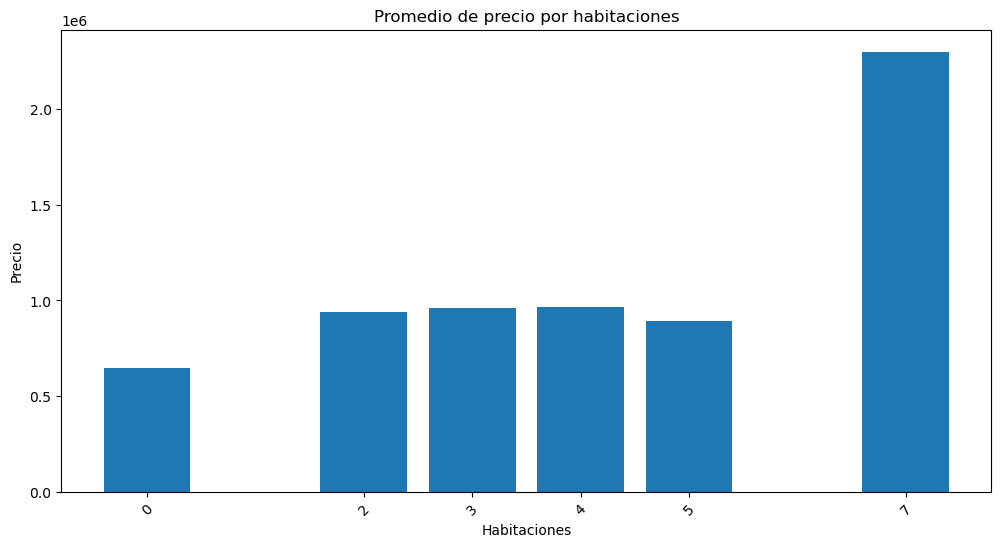

In [31]:
price_rooms = houses_df.groupby("Habitaciones")["Precio"].mean()
# Create a wider figure
plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(price_rooms.index, price_rooms.values)

# Set the labels and title
plt.xlabel("Habitaciones")
plt.ylabel("Precio")
plt.title("Promedio de precio por habitaciones")

# Use adaptive scale for the year axis
plt.xticks(price_rooms.index, rotation=45)

# Show the chart
plt.show()

In [16]:
print(houses_df.dtypes)

Habitaciones      int64
Baños           float64
Precio          float64
URL              object
dtype: object
